In [1]:
import sys
import os
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import sklearn
import scipy
import matplotlib.pyplot as plt
import itertools
import qinfer as qi
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from lfig import LatexFigure

sys.path.append("/home/bf16951/QMD")
import qmla

%matplotlib inline

run_path = "Dec_10/14_40"
# run_path = "Dec_10/16_12"

results = qmla.load_results(
    results_folder = "/home/bf16951/bc_results/",
    results_time = run_path,
    instance_id=1, 
)
q = results['qmla_instance']
es = results['exploration_strategy']

ratings = es.ratings_class.ratings_df

def get_model_f(mid):
    return q.model_f_scores[mid]

ratings['f_score_a'] = ratings['model_a'].apply(get_model_f)
ratings['f_score_b'] = ratings['model_b'].apply(get_model_f)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


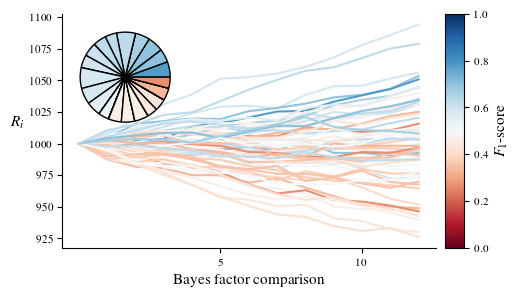

In [2]:
all_ratings = es.ratings_class.all_ratings
model_f_scores = q.model_f_scores
f_score_cmap = es.f_score_cmap

generations = [int(g) for g in all_ratings.generation.unique()]
generations = [0]
num_generations = len(generations)
gen = 0 
fraction = 0.75
lf = LatexFigure(
    fraction=0.75, 
    use_gridspec=True, 
    gridspec_layout=(1, 2),
    gridspec_params={
        'width_ratios' : [1, 0.05],
        'wspace' : 0.05, 
    },
    auto_label=False
)

# TODO : unique linestyle and colour combo for each model ID and tracks across subplots
all_ratings['Model ID'] = all_ratings['model_id']

ax = lf.new_axis()

this_gen_ratings = all_ratings[all_ratings.generation==gen]

colours = {
    m : f_score_cmap(model_f_scores[m])
    for m in this_gen_ratings['model_id']
}

sns.lineplot(
    x = 'idx', 
    y = 'rating', 
    hue = r'Model ID', 
    hue_order = sorted(this_gen_ratings.model_id.unique()),
    data=this_gen_ratings, 
    ax = ax,
    legend=False,
    palette = colours, 
)

ax.set_xlabel("")
ax.set_ylabel(r"$R_i$", rotation=0, labelpad=10)
ax.set_xticks([5, 10])
ax.set_xlabel("Bayes factor comparison")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


inset_ax = inset_axes(
    lf.gridspec_axes[(0,0)], 
    width=fraction*1.5, 
    height=fraction*1.5, 
    loc='upper left'
)

gene_pool = es.genetic_algorithm.gene_pool
gene_pool.sort_values('f_score', inplace=True, ascending=False)
this_gen_genes = gene_pool[gene_pool.generation == 1]
f_scores = this_gen_genes.f_score
colours = [f_score_cmap(f) for f in f_scores]
probabilities = this_gen_genes.probability    

inset_ax.pie(
    probabilities, 
    colors = colours, 
    radius=1.,
    startangle=0, 
    wedgeprops={
        "edgecolor":"k",
        'linewidth': 1, 
        'antialiased': True
    }
)


cbar_ax = lf.new_axis(
    force_position = (0,1),
    auto_label=False
)

cbar = mpl.colorbar.ColorbarBase(
    cbar_ax, 
    cmap = f_score_cmap,
    orientation="vertical",
    label = r"$F_1$-score",
)

# lf.save(
#     os.path.join(
#         "/home/bf16951/thesis/theoretical_study/figures", 
#         "single_generation_all_ratings.pdf"
#     )
# )
